# Americans' View of Cybersecurity

American consumers don't trust the organizations--government or companies--to keep information about them safe, and they also think that data collection is inevitable. However, there is some contradiction. Not only do Americans not trust government and companies to protect their data online from thieves, but they don't do a very good job with protecting their data, either.

1. Most Americans have been affected by a data breach, and the type of incidents they have been affected by.

2. Perception of what they trust, or don't trust.

3. Common security measures they should be using/not using (passwords, device lock, etc)

4. Do consumers punish companies after a breach (measured by stock price). Could be small multiples?

I looked at how Americans handle their own data protection by analyzing the dataset that was published by Pew Research on how well people know about online security and whether or not they actually do those things. The analysis compares different groups and what their security habits were.

In [1]:
#import statements
import pandas as pd
import re
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#open quiz data files
quiz = pd.read_csv("data/cybersecurity.csv")
quiz.shape

(1055, 39)

In [3]:
quiz.head()

,CaseID,weight,XSPANISH,INTERNET,Q1,Q2_A,Q2_B,Q2_C,Q2_D,Q2_E,...,SMART1,SNSINT2,PPAGE,PPEDUCAT,PPETHM,PPGENDER,PPINCIMP,PPMSACAT,PPSTATEN,PPWORK
0,3,1.1998,2,1,1,0,0,0,0,1,...,2,1,63,1,4,2,5,1,59,7
1,4,1.5196,2,1,6,0,0,1,0,0,...,1,1,47,2,4,2,1,1,59,7
2,5,1.2142,1,1,2,0,0,0,1,0,...,1,1,70,1,4,1,13,1,33,5
3,6,1.1868,1,1,6,0,0,0,1,0,...,1,2,60,1,3,1,5,1,93,6
4,7,2.6632,1,1,6,0,0,0,0,1,...,1,2,31,1,4,2,15,0,85,7


In [4]:
quiz = quiz.rename(columns={"Q1": "https", 
                   "Q2_A": "phish_a",
                   'Q2_B': "phish_b",
                   'Q2_C':"phish_c", 
                   'Q2_D':"phish_d", 
                   'Q2_E':"phish_e", 
                   'Q2_Refused':"phish_0", 
                   'Q3':"botnet", 
                   'Q4':"wifi", 
                   'Q5_A':"tfa_a", 
                   'Q5_B':"tfa_b",
                   'Q5_C':"tfa_c", 
                   'Q5_D':"tfa_d", 
                   'Q5_E':"tfa_e", 
                   'Q5_F':"tfa_f", 
                   'Q5_Refused':"tfa_0", 
                   'Q7':"ransomware", 
                   'Q9':"incognito", 
                   'Q10':"tracking", 
                   'Q11':"email",
                   'Q12':"creditreport", 
                   'Q13':"secure", 
                   'Q14':"vpn", 
                   'SNSINT2':"socmedia", 
                   'PPAGE':"age",
                   'PPEDUCAT':"education", 
                   'PPETHM':"ethnicity", 
                   'PPGENDER':"gender", 
                   'PPINCIMP':"income", 
                   'PPSTATEN':"state",
                   'PPWORK':"employment",
                            'PPMSACAT':"msa"
                            
                  })

http://www.thearda.com/Archive/Files/Codebooks/MORALITY_CB.asp
    259) Education (Categorical) (PPEDUCAT)
TOTAL	%
1) Less than high school	194	12.8
2) High school	459	30.2
3) Some college	437	28.8
4) Bachelor's degree or higher	430	28.3
TOTAL	1520	100.0
[ Analyze results | Add to Question Bank | View Question Bank ]
260) Race/Ethnicity (PPETHM)
TOTAL	%
1) White, Non-Hispanic	1015	66.8
2) Black, Non-Hispanic	175	11.5
3) Other, Non-Hispanic	87	5.7
4) Hispanic	222	14.6
5) 2+ Races, Non-Hispanic	20	1.3
TOTAL	1519	100.0
71) State (PPSTATEN)
TOTAL	%
11) ME	9	.6
12) NH	5	.3
13) VT	4	.3
14) MA	40	2.6
15) RI	0	0
16) CT	18	1.2
21) NY	93	6.1
22) NJ	40	2.6
23) PA	69	4.5
31) OH	56	3.7
32) IN	28	1.8
33) IL	53	3.5
34) MI	42	2.8
35) WI	32	2.1
41) MN	23	1.5
42) IA	16	1.1
43) MO	41	2.7
44) ND	3	.2
45) SD	8	.5
46) NE	9	.6
47) KS	15	1
51) DE	3	.2
52) MD	27	1.8
53) DC	2	.1
54) VA	43	2.8
55) WV	10	.7
56) NC	47	3.1
57) SC	25	1.6
58) GA	51	3.4
59) FL	113	7.4
61) KY	26	1.7
62) TN	23	1.5
63) AL	18	1.2
64) MS	4	.3
71) AR	15	1
72) LA	18	1.2
73) OK	25	1.6
74) TX	113	7.4
81) MT	8	.5
82) ID	3	.2
83) WY	3	.2
84) CO	26	1.7
85) NM	2	.1
86) AZ	38	2.5
87) UT	4	.3
88) NV	34	2.2
91) WA	51	3.4
92) OR	18	1.2
93) CA	155	10.2
94) AK	2	.1
95) HI	7	.5
 Current Employee Status (PPWORK)
TOTAL	%
1) Working – as a paid employee	706	46.5
2) Working – self-employee	118	7.8
3) Not working – on temporary layoff from job	14	.9
4) Not working – looking for work	149	9.8
5) Not working - retired	271	17.8
6) Not working - disabled	115	7.6
7) Not working – other
MSA Status (PPMSACAT)
TOTAL	%
0) Non-metro	242	15.9
1) Metro	1277	84.1

In [5]:
#collapse phish questions
quiz['phish']=0
quiz.loc[quiz['phish_a'] == 1, 'phish'] = 1
quiz.loc[quiz['phish_b'] == 1, 'phish'] = 2
quiz.loc[quiz['phish_c'] == 1, 'phish'] = 3
quiz.loc[quiz['phish_d'] == 1, 'phish'] = 4
quiz.loc[quiz['phish_e'] == 1, 'phish'] = 5
quiz.loc[quiz['phish_0'] == 1, 'phish'] = 0

In [6]:
#collapse 2fa questions
quiz['tfa']=0
quiz.loc[quiz['tfa_a'] == 1, 'tfa'] = 1
quiz.loc[quiz['tfa_b'] == 1, 'tfa'] = 2
quiz.loc[quiz['tfa_c'] == 1, 'tfa'] = 3
quiz.loc[quiz['tfa_d'] == 1, 'tfa'] = 4
quiz.loc[quiz['tfa_e'] == 1, 'tfa'] = 5
quiz.loc[quiz['tfa_0'] == 1, 'tfa'] = 0

In [7]:
#calculate quiz results 
quiz['score'] = 0
quiz.loc[quiz['https'] ==2,'score']=quiz.score+1 
quiz.loc[quiz['phish'] ==4,'score']=quiz.score+1
quiz.loc[quiz['botnet'] ==1, 'score']=quiz.score+1
quiz.loc[quiz['wifi'] ==2,'score']=quiz.score+1
quiz.loc[quiz['tfa'] ==1,'score']=quiz.score+1
quiz.loc[quiz['ransomware'] ==2,'score']=quiz.score+1
quiz.loc[quiz['incognito'] ==1,'score']=quiz.score+1
quiz.loc[quiz['tracking'] ==2,'score']=quiz.score+1
quiz.loc[quiz['email'] ==2,'score']=quiz.score+1
quiz.loc[quiz['creditreport'] ==1,'score']=quiz.score+1
quiz.loc[quiz['secure'] ==2,'score']=quiz.score+1
quiz.loc[quiz['vpn'] ==1,'score']=quiz.score+1
quiz.score = quiz.score/12*100

In [8]:
#group total score by gender
#men 1,women 2
men = pd.DataFrame(quiz.loc[quiz.gender==1, 'score'])
women = pd.DataFrame(quiz.loc[quiz.gender==2, 'score'])

In [9]:
# women tended to score worse on the test
g_men = men.score.value_counts().rename_axis('unique_values').to_frame('men')
g_women = women.score.value_counts().rename_axis('unique_values').to_frame('women')
scores =  pd.concat([g_women, g_men], axis=1)
scores

,women,men
unique_values,,
0.000000,36,23
8.333333,47,29
16.666667,76,37
25.000000,84,48
33.333333,80,57
41.666667,60,52
50.000000,56,55
58.333333,51,39
66.666667,41,49


In [10]:
# the typical user scored less than half right 
# men didn't do *that* much better
# using median gives 41.6 for men and 33.33 for women
quiz.groupby('gender').score.mean()

gender
1    46.115674
2    36.003521
Name: score, dtype: float64

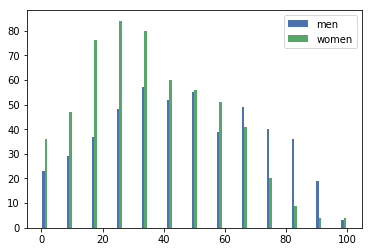

In [11]:
#scores by gender
plt.style.use('seaborn-deep')
bins = np.linspace(0,100)
plt.hist([men.to_numpy(), women.to_numpy()], bins, label=['men', 'women'])
plt.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'Frequency')

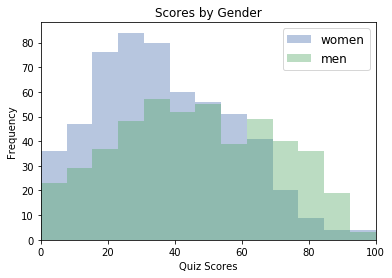

In [12]:
#different way to chart
sns.distplot(women['score'], kde=False, bins=13,  label='women')
sns.distplot(men['score'],  kde=False, bins=13, label='men')
plt.legend(prop={'size': 12})
plt.title('Scores by Gender')
plt.xlabel('Quiz Scores')
plt.xlim(0,100)
plt.ylabel('Frequency')

16    159
13    102
15     85
12     85
17     67
14     67
11     66
19     65
9      48
10     46
18     46
8      44
7      40
4      31
6      29
5      26
1      24
2      15
3      10
Name: income, dtype: int64

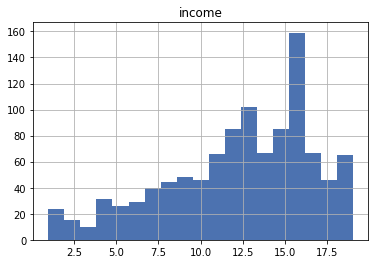

In [13]:
#income
#1) Less than $5,000	39	2.6
#2) $5,000 to $7,499	21	1.4
#3) $7,500 to $9,999	17	1.1
#4) $10,000 to $12,499	47	3.1
#5) $12,500 to $14,999	39	2.6
#6) $15,000 to $19,999	62	4.1
#7) $20,000 to $24,999	71	4.7
#8) $25,000 to $29,999	64	4.2
#9) $30,000 to $34,999	83	5.5
#10) $35,000 to $39,999	86	5.7
#11) $40,000 to $49,999	118	7.8
#12) $50,000 to $59,999	152	10
#13) $60,000 to $74,999	137	9
#14) $75,000 to $84,999	112	7.4
#15) $85,000 to $99,999	114	7.5
#16) $100,000 to $124,999	163	10.7
#17) $125,000 to $149,999	88	5.8
#18) $150,000 to $174,999	47	3.1
#19) $175,000 or more	60	3.9

bins = np.linspace(0,20)
quiz.hist(column='income',bins=19)

# median income is 13, the biggest number is for 16
quiz.income.value_counts()
#quiz.income.median()

In [14]:
# lower income, lower test scores
quiz.groupby('income').score.mean()

income
1     22.222222
2     27.777778
3     19.166667
4     29.569892
5     31.410256
6     23.563218
7     36.250000
8     34.659091
9     31.770833
10    32.065217
11    33.459596
12    39.803922
13    42.892157
14    42.786070
15    42.941176
16    47.222222
17    53.855721
18    51.086957
19    52.692308
Name: score, dtype: float64

4    369
3    306
2    291
1     89
Name: education, dtype: int64

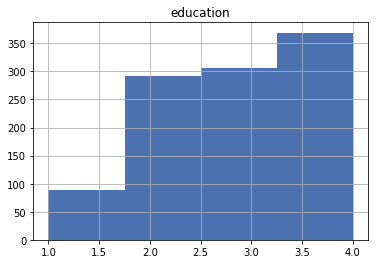

In [15]:
bins = np.linspace(0,4)
quiz.hist(column='education',bins=4)

#most at 4,median is 3
quiz.education.value_counts()
#quiz.education.median()

In [16]:
#lower education lower quiz
quiz.groupby('education').score.median()

education
1    25.000000
2    25.000000
3    41.666667
4    50.000000
Name: score, dtype: float64

Text(0, 0.5, 'Frequency')

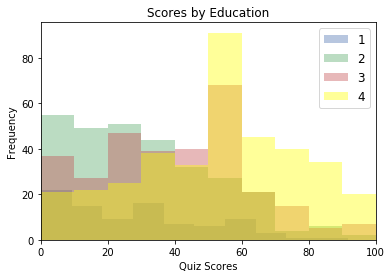

In [33]:
# you shouldn't need a college degree to know security
less = pd.DataFrame(quiz.loc[quiz.education==1])
hs = pd.DataFrame(quiz.loc[quiz.education==2])
some = pd.DataFrame(quiz.loc[quiz.education==3])
coll = pd.DataFrame(quiz.loc[quiz.education==4])
#similar distribution but lower frequency, so whites aren't necessarily better
sns.distplot(less['score'], kde=False, bins=10, label='1')
sns.distplot(hs['score'], kde=False, bins=10, label='2')
sns.distplot(some['score'], kde=False, bins=10, label='3')
sns.distplot(coll['score'], kde=False, bins=10, label='4',color = 'yellow')
plt.legend(prop={'size': 12})
plt.title('Scores by Education')
plt.xlabel('Quiz Scores')
plt.xlim(0,100)
plt.ylabel('Frequency')

1    761
4    123
2     91
3     48
5     32
Name: ethnicity, dtype: int64

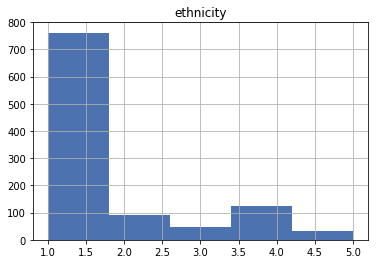

In [17]:
#predominantly white
bins = np.linspace(0,20)
quiz.hist(column='ethnicity',bins=5)

#most at 1,median is 1
quiz.ethnicity.value_counts()
#quiz.ethnicity.median()

In [18]:
#group total score by race
white = pd.DataFrame(quiz.loc[quiz.ethnicity==1, 'score'])
poc = pd.DataFrame(quiz.loc[quiz.gender>1, 'score'])# women tended to score worse on the test
g_w = white.score.value_counts().rename_axis('unique_values').to_frame('white')
g_p = poc.score.value_counts().rename_axis('unique_values').to_frame('poc')
race =  pd.concat([g_w, g_p], axis=1)
race

,white,poc
unique_values,,
0.000000,43,36
8.333333,53,47
16.666667,70,76
25.000000,80,84
33.333333,101,80
41.666667,82,60
50.000000,80,56
58.333333,72,51
66.666667,72,41


Text(0, 0.5, 'Frequency')

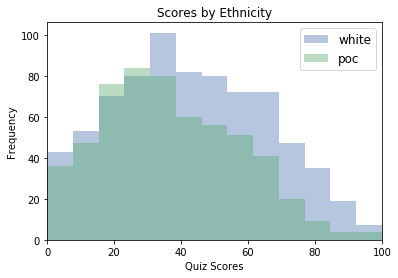

In [19]:
#similar distribution but lower frequency, so whites aren't necessarily better
sns.distplot(white['score'], kde=False, bins=13,  label='white')
sns.distplot(poc['score'],  kde=False, bins=13, label='poc')
plt.legend(prop={'size': 12})
plt.title('Scores by Ethnicity')
plt.xlabel('Quiz Scores')
plt.xlim(0,100)
plt.ylabel('Frequency')

In [ ]:
#run regressions to find significance